## ***Author :*** [***`Fawad Ali Shaikh`***](https://www.kaggle.com/fawadalishaikh)
##***Competition :*** [***`Binary Classification with a Bank Churn Dataset`***](https://www.kaggle.com/competitions/playground-series-s4e1/overview)







- ***Linkedin :*** [***`Fawad Ali`***](https://www.linkedin.com/in/fawad-ali5/)
- ***Github :*** [***`Fawad5`***](https://github.com/Fawad5/)

In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download binary-classification-with-a-bank-churn-dataset-1


  0% 0.00/637k [00:00<?, ?B/s]
100% 637k/637k [00:00<00:00, 82.9MB/s]


In [ ]:
# Unzip

! unzip /content/binary-classification-with-a-bank-churn-dataset-1.zip

Archive:  /content/binary-classification-with-a-bank-churn-dataset-1.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## ***Import Libraries***

In [ ]:
# install catboost library
!pip install catboost -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


In [ ]:
#!pip install tensorflow

In [ ]:
# to handle data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# to preprocess data

from sklearn.preprocessing import StandardScaler,,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer



# machine learning tasks
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


#metrics
from sklearn.metrics import accuracy_score,precision_score, f1_score ,recall_score ,confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score

# ignore warnings

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## ***Load The Data***

In [ ]:
# train data

df_train = pd.read_csv('train.csv')
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15665943.0,Nnamutaezinwa,616.0,Germany,Female,29.0,1.0,164947.05,2.0,0.0,1.0,183584.14,0.0
1,1,15623220.0,Yermakov,642.0,France,Female,29.0,7.0,0.00,2.0,1.0,1.0,139919.38,0.0
2,2,15690670.0,Hsieh,537.0,France,Male,38.0,1.0,86055.17,1.0,1.0,1.0,125422.66,0.0
3,3,15683053.0,Chidumaga,609.0,Germany,Female,34.0,2.0,105420.08,2.0,1.0,1.0,91366.42,0.0
4,4,15736228.0,Hsing,588.0,France,Female,35.0,4.0,0.00,2.0,1.0,1.0,151887.16,0.0


In [ ]:
# test data

df_test = pd.read_csv('test.csv')
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15606861.0,P'eng,687.0,France,Female,34.0,3.0,0.00,2.0,0.0,1.0,177784.68
1,15001,15747265.0,Shubin,762.0,France,Male,33.0,10.0,0.00,2.0,1.0,1.0,149535.97
2,15002,15684908.0,Chibugo,647.0,France,Male,29.0,7.0,0.00,2.0,1.0,1.0,169415.61
3,15003,15805764.0,Ikedinachukwu,590.0,France,Male,27.0,2.0,0.00,2.0,1.0,0.0,184524.74
4,15004,15709387.0,Hs?,616.0,Spain,Male,29.0,7.0,125710.53,1.0,0.0,1.0,166682.57


In [ ]:
# sample_submission file

df_sample = pd.read_csv('sample_submission.csv')
df_sample.head()

,id,Exited
0,15000,0.5
1,15001,0.5
2,15002,0.5
3,15003,0.5
4,15004,0.5


## ***Let's Begin With Exploratory Data Analysis (EDA) ✌️***

In [ ]:
print('In Train dataset')
print(f'Number of rows: {df_train.shape[0]}')
print(f'Number of columns: {df_train.shape[1]}')
print('------------------------')
print('In Test dataset')
print(f'Number of rows: {df_test.shape[0]}')
print(f'Number of columns: {df_test.shape[1]}')

In Train dataset
Number of rows: 15000
Number of columns: 14
------------------------
In Test dataset
Number of rows: 10000
Number of columns: 13


In [ ]:
# columns in train

df_train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
# columns in test

df_test.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [ ]:
# Information about train dataset

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [ ]:
# Information about test dataset

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10000 non-null  int64  
 1   CustomerId       10000 non-null  float64
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  float64
 10  HasCrCard        10000 non-null  float64
 11  IsActiveMember   10000 non-null  float64
 12  EstimatedSalary  10000 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 1015.8+ KB


In [ ]:
# Summary of train dataset in transpose

df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15000.0,7.499500e+03,4.330271e+03,0.00,3749.75,7499.50,11249.25,1.499900e+04
CustomerId,15000.0,1.591025e+07,1.806311e+07,15565701.00,15633870.00,15690670.00,15757843.00,1.580657e+09
CreditScore,15000.0,6.579522e+02,7.314624e+01,431.00,601.00,661.00,708.00,8.500000e+02
Age,15000.0,3.785280e+01,8.207210e+00,18.00,32.00,37.00,42.00,7.400000e+01
Tenure,15000.0,5.015667e+00,2.771245e+00,0.00,3.00,5.00,7.00,1.000000e+01
Balance,15000.0,4.255361e+04,5.955889e+04,0.00,0.00,0.00,108895.93,1.878420e+05
NumOfProducts,15000.0,1.581467e+00,5.310825e-01,1.00,1.00,2.00,2.00,4.000000e+00
HasCrCard,15000.0,7.834000e-01,4.119414e-01,0.00,1.00,1.00,1.00,1.000000e+00
IsActiveMember,15000.0,4.986667e-01,5.000149e-01,0.00,0.00,0.00,1.00,1.000000e+00
EstimatedSalary,15000.0,1.185088e+05,1.204743e+05,11.55,82820.85,123475.83,155851.21,1.377892e+07


In [ ]:
# Unique values in train datset

print('Unique values in Train dataset\n')
print(df_train.nunique())

Unique values in Train dataset

id                 15000
CustomerId          6311
Surname              778
CreditScore          376
Geography              3
Gender                 2
Age                   56
Tenure                11
Balance             3294
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     6264
Exited                 2
dtype: int64


## ***Check Null Values 🚫***

In [ ]:
# Check null values

print(df_train.isnull().sum().sort_values(ascending=False)/len(df_train)*100)

id                 0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64


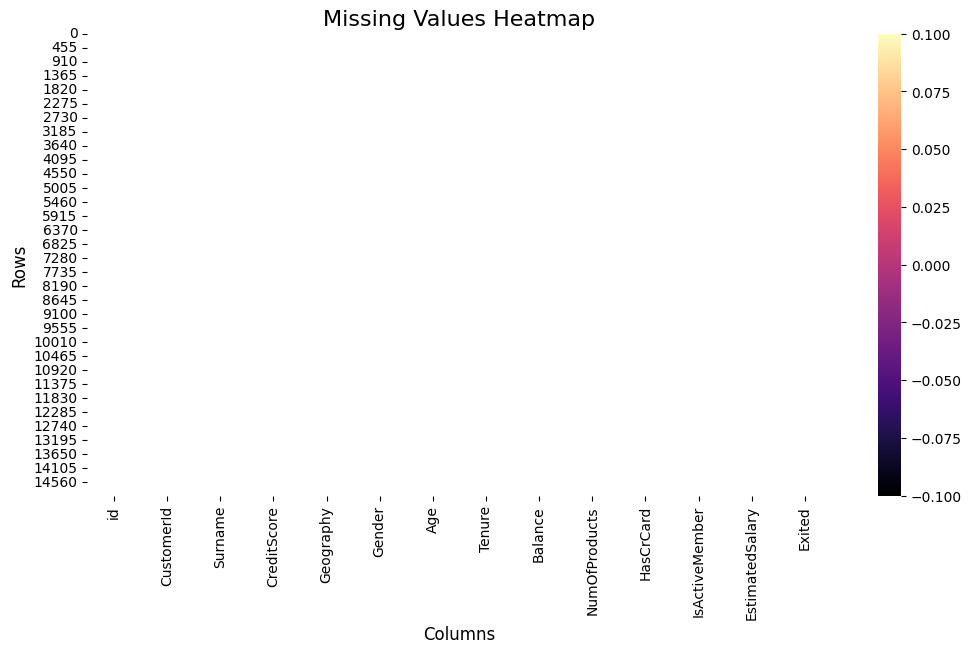

In [ ]:
# plot it using seaborn

fig = plt.figure(figsize=(12, 6))
sns.heatmap(df_train.isnull(), cmap='magma', annot=False, fmt='.2f', linewidths=.5)
plt.title('Missing Values Heatmap', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows', fontsize=12)

plt.show()

* ***So, we have 0 null values***

## ***Let's Deal with Outliers ⚠️***

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [ ]:
# split data into numerical & categorical columns

num_cols = [col for col in df_train.columns if df_train[col].dtype!='O']
cat_cols = [col for col in df_train.columns if col not in num_cols]


In [ ]:
# numerical columns

num_cols

['id',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

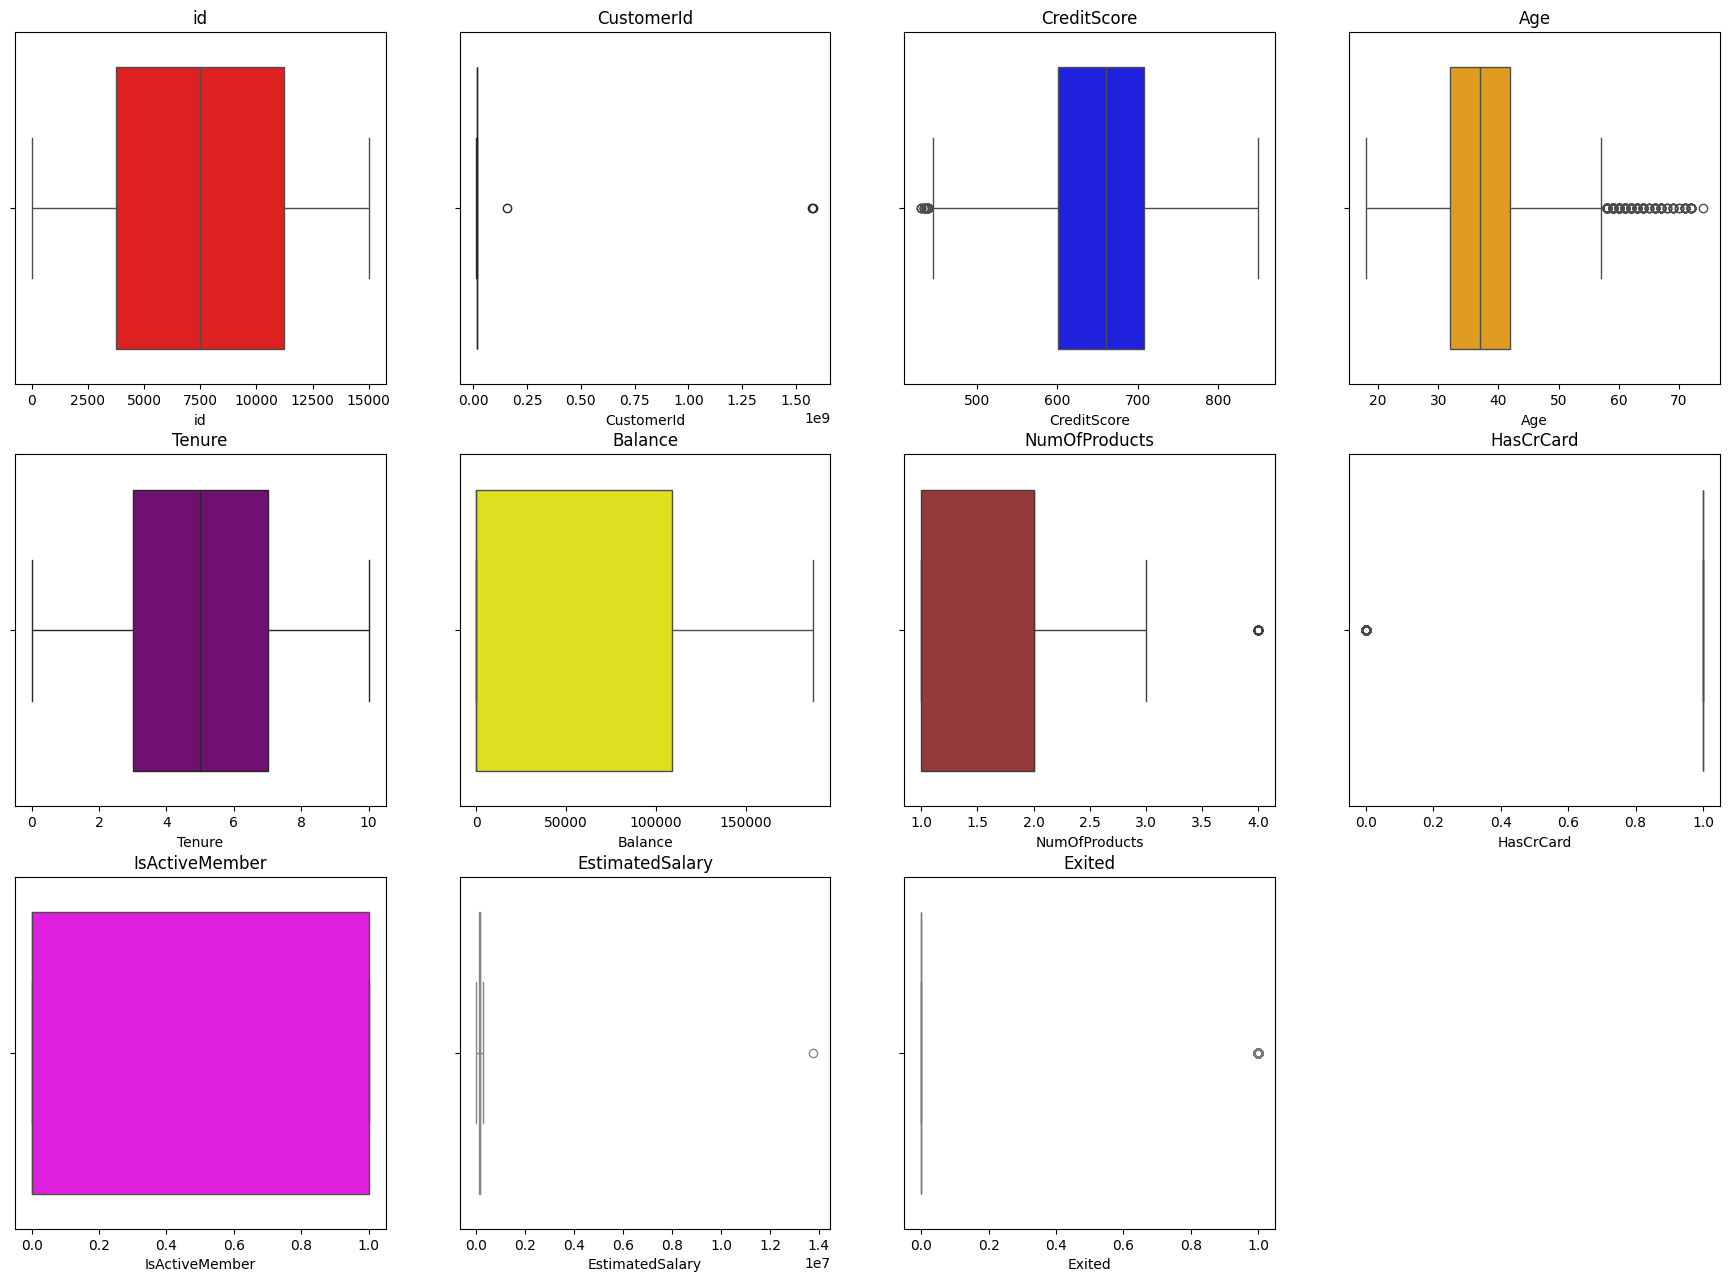

In [ ]:
# make Boxplot of numeric columns using for loop
plt.figure(figsize=(22, 32))

# Extend the colors list to have at least as many colors as num_cols
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'brown', 'cyan', 'magenta','pink','lightblue']

# Calculate the number of rows needed based on the number of columns
num_rows = (len(num_cols) + 1) // 2  # Divide by 2 and round up

for i, col in enumerate(num_cols):
    plt.subplot(num_rows, 4, i+1)  # Adjusted to dynamic rows, 2 columns
    sns.boxplot(x=df_train[col], color=colors[i % len(colors)]) # Use modulo operator to cycle through colors
    plt.title(col)
plt.show()

***It doesn't give useful insights***

### ***Let's make plots (Numeric Columns) 📊***

In [ ]:
df = df_train.copy()

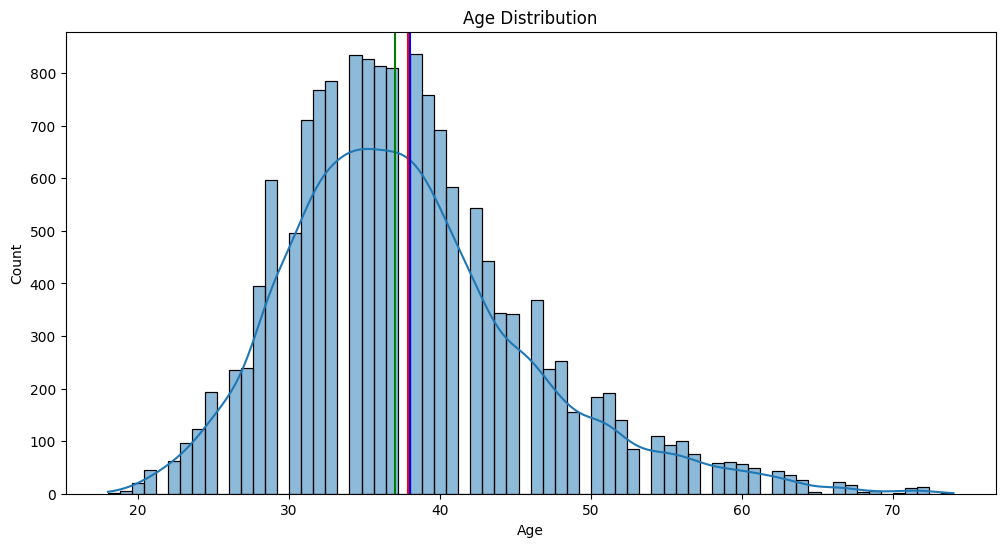

-----------------------
Mean 37.8528
Median 37.0
Mode 0    38.0
Name: Age, dtype: float64


In [ ]:
# Explore age column

# histplot of age using seaborn

fig = plt.figure(figsize=(12,6))
sns.histplot(df['Age'], kde=True)
plt.axvline(df['Age'].mean(),color='red')
plt.axvline(df['Age'].median(),color='green')
plt.axvline(df['Age'].mode()[0],color='blue')
plt.title('Age Distribution')
plt.show()

# print the values of mean, median & mode
print("-----------------------")
print('Mean',df['Age'].mean())
print('Median',df['Age'].median())
print('Mode',df['Age'].mode())


* ***Somehow data is normally distributed***

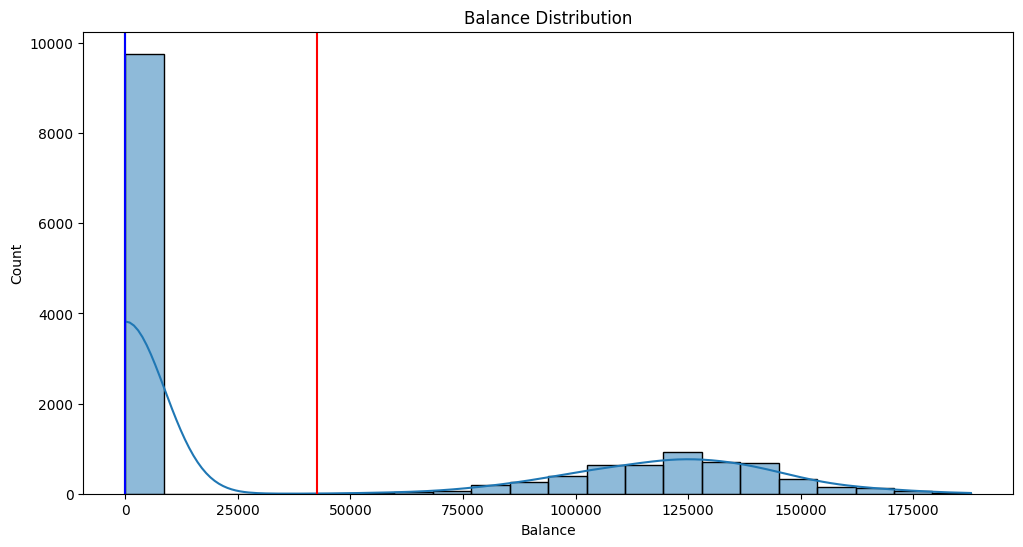

-----------------------
Mean 42553.61342733333
Median 0.0
Mode 0    0.0
Name: Balance, dtype: float64


In [ ]:
# Explore Balance column

# histplot of age using seaborn

fig = plt.figure(figsize=(12,6))
sns.histplot(df['Balance'], kde=True)
plt.axvline(df['Balance'].mean(),color='red')
plt.axvline(df['Balance'].median(),color='green')
plt.axvline(df['Balance'].mode()[0],color='blue')
plt.title('Balance Distribution')
plt.show()

# print the values of mean, median & mode
print("-----------------------")
print('Mean',df['Balance'].mean())
print('Median',df['Balance'].median())
print('Mode',df['Balance'].mode())


* ***It is not Gaussian (normally) distributed***

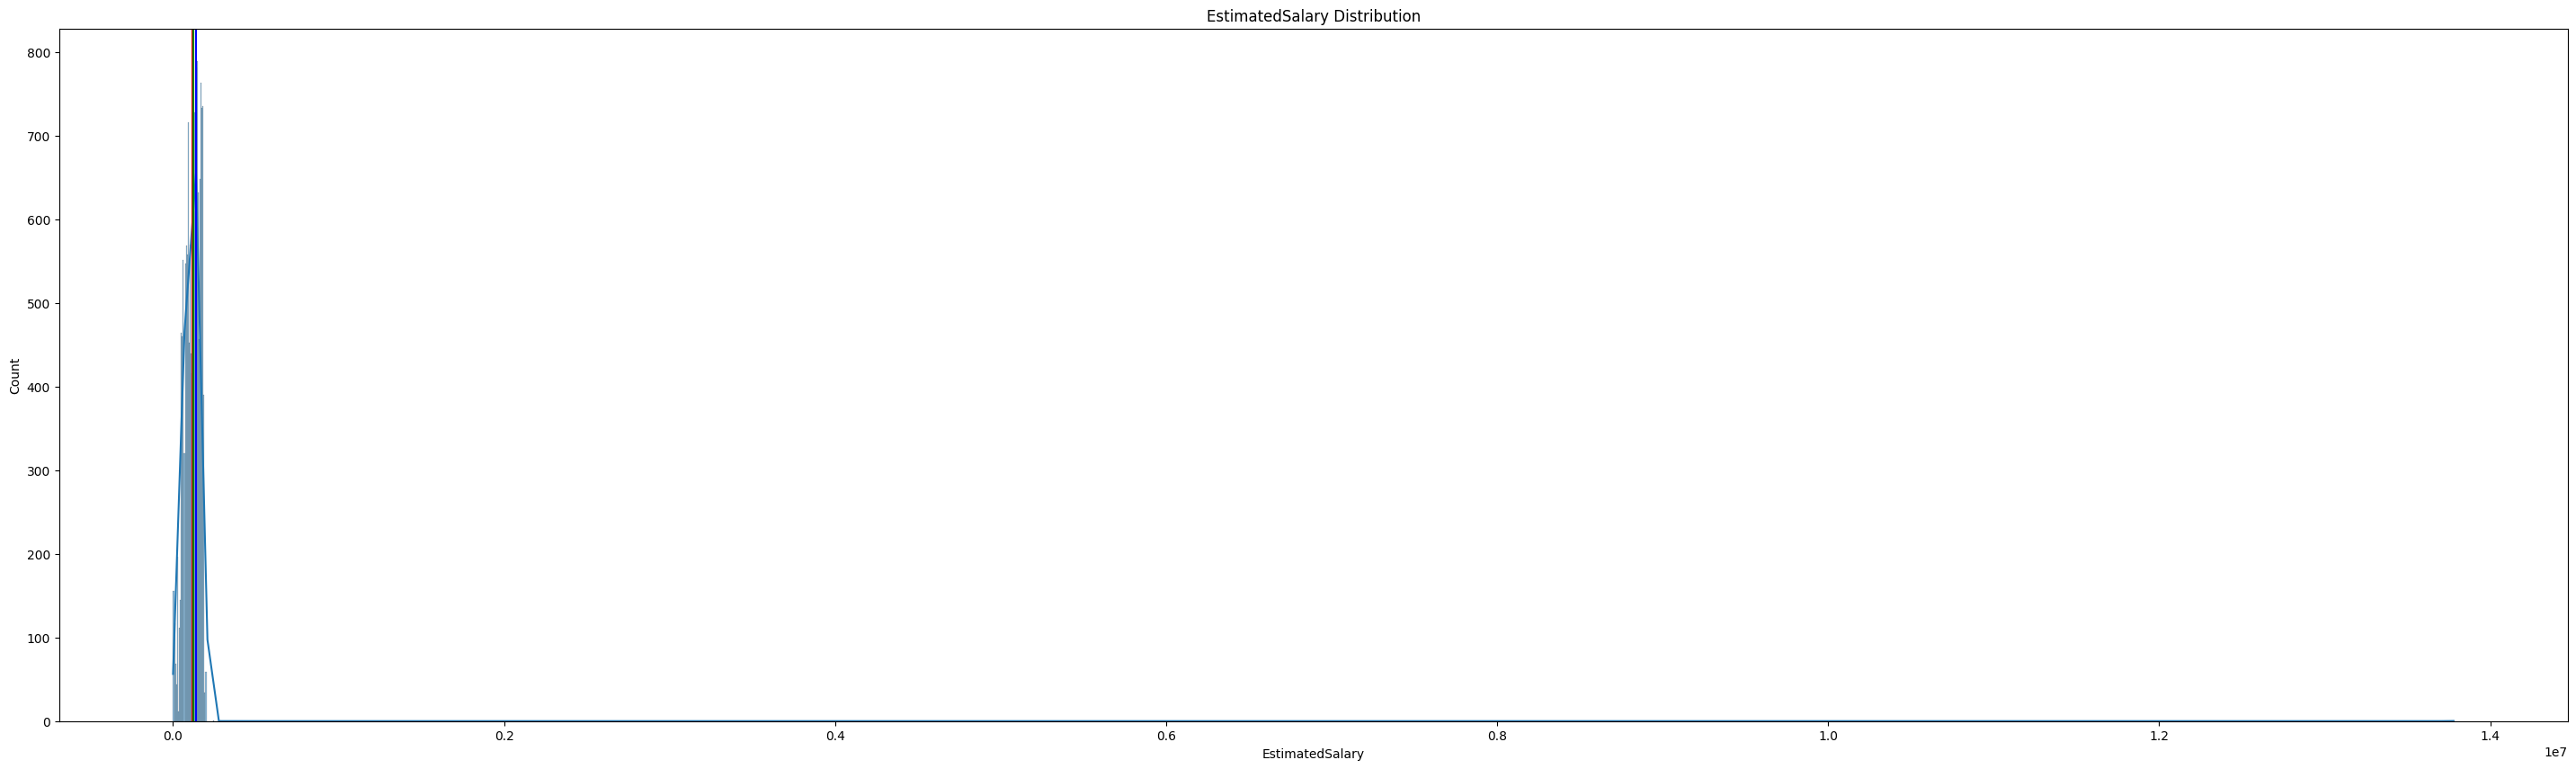

-----------------------
Mean 118508.84770799999
Median 123475.83
Mode 0    140941.47
1    166677.35
Name: EstimatedSalary, dtype: float64


In [ ]:
# Explore EstimatedSalary column

# histplot of EstimatedSalary using seaborn

fig = plt.figure(figsize=(36,10))
sns.histplot(df['EstimatedSalary'], kde=True)
plt.axvline(df['EstimatedSalary'].mean(),color='red')
plt.axvline(df['EstimatedSalary'].median(),color='green')
plt.axvline(df['EstimatedSalary'].mode()[0],color='blue')
plt.title('EstimatedSalary Distribution')
plt.show()

# print the values of mean, median & mode
print("-----------------------")
print('Mean',df['EstimatedSalary'].mean())
print('Median',df['EstimatedSalary'].median())
print('Mode',df['EstimatedSalary'].mode())


* ***It is not Gaussian (normally) distributed***

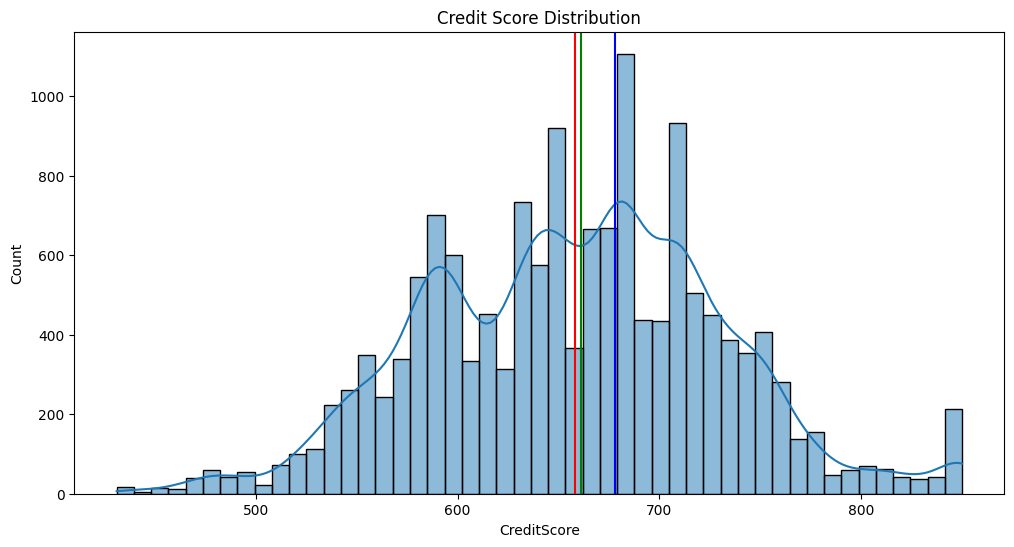

-----------------------
Mean 657.9522
Median 661.0
Mode 0    678.0
Name: CreditScore, dtype: float64


In [ ]:
# Explore Credit Score column

# histplot of Credit Score using seaborn

fig = plt.figure(figsize=(12,6))
sns.histplot(df['CreditScore'], kde=True)
plt.axvline(df['CreditScore'].mean(),color='red')
plt.axvline(df['CreditScore'].median(),color='green')
plt.axvline(df['CreditScore'].mode()[0],color='blue')
plt.title('Credit Score Distribution')
plt.show()

# print the values of mean, median & mode
print("-----------------------")
print('Mean',df['CreditScore'].mean())
print('Median',df['CreditScore'].median())
print('Mode',df['CreditScore'].mode())


* ***It is somehow Gaussian (normally) distributed***

## ***Let's make plots (Categorical Columns) 📊***

In [ ]:
cat_cols

['Surname', 'Geography', 'Gender']

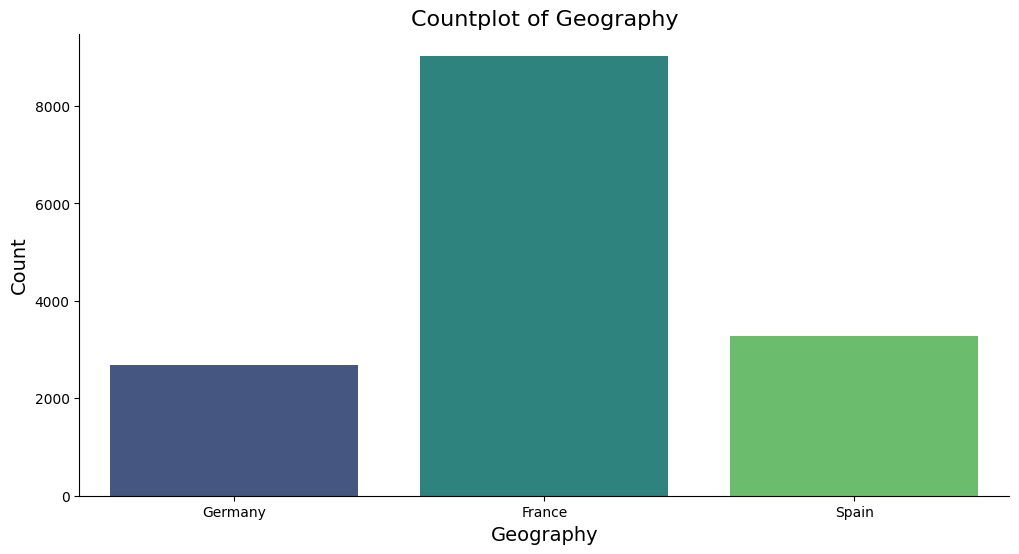

In [ ]:
# countplot of Geography

fig = plt.figure(figsize=(12, 6))
sns.countplot(df, x='Geography', palette='viridis')  # Use a color palette
plt.title('Countplot of Geography', fontsize=16, fontweight='medium')  # Enhance title
plt.xlabel('Geography', fontsize=14)  # Enhance x-axis label
plt.ylabel('Count', fontsize=14)  # Enhance y-axis label
plt.xticks(fontsize=10)  # Enhance x-axis tick labels
plt.yticks(fontsize=10)  # Enhance y-axis tick labels
sns.despine()  # Remove top and right spines for a cleaner look

plt.show()

* ***This shows France has the most counts***
* ***Spain has more counts than Germany***

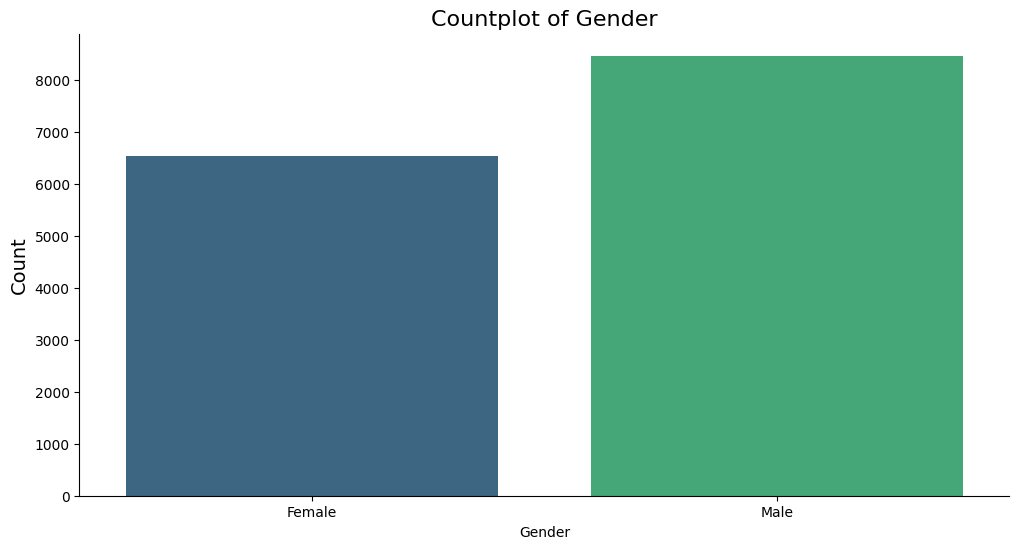

In [ ]:
# countplot of Gender

fig = plt.figure(figsize=(12,6))
sns.countplot(df,x ='Gender',palette='viridis')
plt.title('Countplot of Gender', fontsize=16, fontweight='medium')
plt.ylabel('Count', fontsize=14)  # Enhance y-axis label
plt.xticks(fontsize=10)  # Enhance x-axis tick labels
plt.yticks(fontsize=10)  # Enhance y-axis tick labels
sns.despine()  # Remove top and right spines for a cleaner look
plt.show()

***We have more males than females***

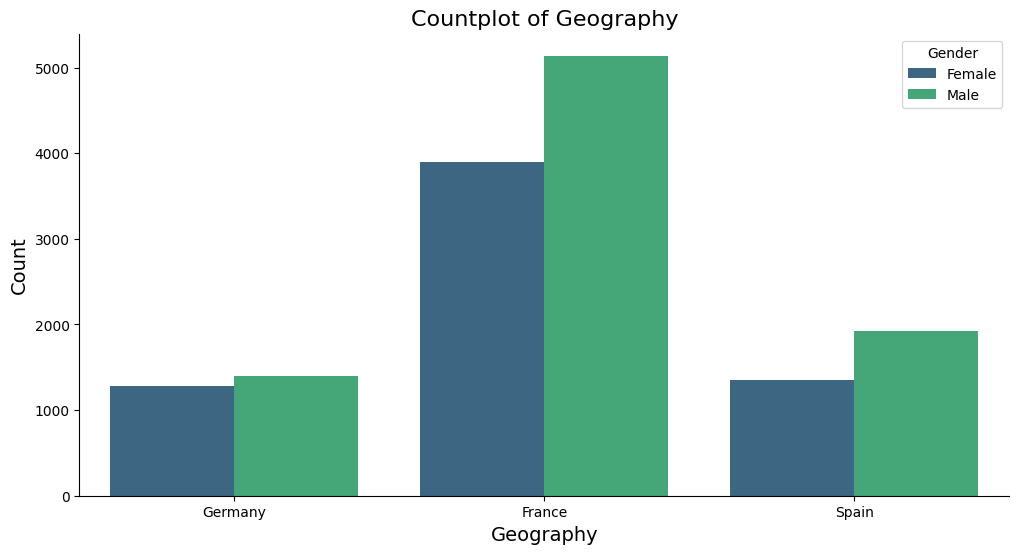

In [ ]:
# countplot of Geography based on Gender

fig = plt.figure(figsize=(12, 6))
sns.countplot(df, x='Geography', palette='viridis', hue='Gender')  # Use a color palette
plt.title('Countplot of Geography', fontsize=16, fontweight='medium')  # Enhance title
plt.xlabel('Geography', fontsize=14)  # Enhance x-axis label
plt.ylabel('Count', fontsize=14)  # Enhance y-axis label
plt.xticks(fontsize=10)  # Enhance x-axis tick labels
plt.yticks(fontsize=10)  # Enhance y-axis tick labels
sns.despine()  # Remove top and right spines for a cleaner look


plt.show()

* ***France has highest number of males & females***
* ***Germany has almost same number of males & females***
* ***Spain has more number of males than females***


In [ ]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15665943.0,Nnamutaezinwa,616.0,Germany,Female,29.0,1.0,164947.05,2.0,0.0,1.0,183584.14,0.0
1,1,15623220.0,Yermakov,642.0,France,Female,29.0,7.0,0.00,2.0,1.0,1.0,139919.38,0.0
2,2,15690670.0,Hsieh,537.0,France,Male,38.0,1.0,86055.17,1.0,1.0,1.0,125422.66,0.0
3,3,15683053.0,Chidumaga,609.0,Germany,Female,34.0,2.0,105420.08,2.0,1.0,1.0,91366.42,0.0
4,4,15736228.0,Hsing,588.0,France,Female,35.0,4.0,0.00,2.0,1.0,1.0,151887.16,0.0


### ***Pre-Processing***

In [ ]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15000.000000,1.500000e+04,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000
mean,7499.500000,1.591025e+07,657.952200,37.85280,5.015667,42553.613427,1.581467,0.783400,0.498667,1.185088e+05,0.207733
std,4330.271354,1.806311e+07,73.146243,8.20721,2.771245,59558.894027,0.531083,0.411941,0.500015,1.204743e+05,0.405698
min,0.000000,1.556570e+07,431.000000,18.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.155000e+01,0.000000
25%,3749.750000,1.563387e+07,601.000000,32.00000,3.000000,0.000000,1.000000,1.000000,0.000000,8.282085e+04,0.000000
50%,7499.500000,1.569067e+07,661.000000,37.00000,5.000000,0.000000,2.000000,1.000000,0.000000,1.234758e+05,0.000000
75%,11249.250000,1.575784e+07,708.000000,42.00000,7.000000,108895.930000,2.000000,1.000000,1.000000,1.558512e+05,0.000000
max,14999.000000,1.580657e+09,850.000000,74.00000,10.000000,187841.990000,4.000000,1.000000,1.000000,1.377892e+07,1.000000


In [ ]:
# Scale creditscore, balance, estimatedsalary in train data using standard scalar

df['CreditScore'] = StandardScaler().fit_transform(df[['CreditScore']])
df['Balance'] = StandardScaler().fit_transform(df[['Balance']])
df['EstimatedSalary'] = StandardScaler().fit_transform(df[['EstimatedSalary']])


In [ ]:
# encode categorical columns in train data separately using label encoder

df['Geography'] = LabelEncoder().fit_transform(df['Geography'])
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])


In [ ]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15665943.0,Nnamutaezinwa,-0.573558,1,0,29.0,1.0,2.055067,2.0,0.0,1.0,0.540177,0.0
1,1,15623220.0,Yermakov,-0.218094,0,0,29.0,7.0,-0.714503,2.0,1.0,1.0,0.177725,0.0
2,2,15690670.0,Hsieh,-1.653622,0,1,38.0,1.0,0.730420,1.0,1.0,1.0,0.057390,0.0
3,3,15683053.0,Chidumaga,-0.669260,1,0,34.0,2.0,1.055570,2.0,1.0,1.0,-0.225304,0.0
4,4,15736228.0,Hsing,-0.956365,0,0,35.0,4.0,-0.714503,2.0,1.0,1.0,0.277067,0.0


In [ ]:
# Scale creditscore, balance, estimatedsalary in test data using standard scalar

df_test['CreditScore'] = StandardScaler().fit_transform(df_test[['CreditScore']])
df_test['Balance'] = StandardScaler().fit_transform(df_test[['Balance']])
df_test['EstimatedSalary'] = StandardScaler().fit_transform(df_test[['EstimatedSalary']])


In [ ]:
# encode categorical columns in test data separately using label encoder

df_test['Geography'] = LabelEncoder().fit_transform(df_test['Geography'])
df_test['Gender'] = LabelEncoder().fit_transform(df_test['Gender'])


In [ ]:
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15606861.0,P'eng,0.389392,0,0,34.0,3.0,-0.721066,2.0,0.0,1.0,1.261008
1,15001,15747265.0,Shubin,1.420527,0,1,33.0,10.0,-0.721066,2.0,1.0,1.0,0.663539
2,15002,15684908.0,Chibugo,-0.160546,0,1,29.0,7.0,-0.721066,2.0,1.0,1.0,1.084000
3,15003,15805764.0,Ikedinachukwu,-0.944209,0,1,27.0,2.0,-0.721066,2.0,1.0,0.0,1.403563
4,15004,15709387.0,Hs?,-0.586749,2,1,29.0,7.0,1.376060,1.0,0.0,1.0,1.026195


## ***Let's Conquer The Machine Learning 🏆***

In [ ]:
# Check Columns

df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
# Define features and target

X = df.drop(['id', 'CustomerId', 'Surname','Exited'], axis=1)
y = df['Exited']

df_test = df_test.drop(['id', 'CustomerId', 'Surname'], axis=1)

In [ ]:
# Spilit the data into X train and y train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.573558,1,0,29.0,1.0,2.055067,2.0,0.0,1.0,0.540177
1,-0.218094,0,0,29.0,7.0,-0.714503,2.0,1.0,1.0,0.177725
2,-1.653622,0,1,38.0,1.0,0.730420,1.0,1.0,1.0,0.057390
3,-0.669260,1,0,34.0,2.0,1.055570,2.0,1.0,1.0,-0.225304
4,-0.956365,0,0,35.0,4.0,-0.714503,2.0,1.0,1.0,0.277067


In [ ]:
# Create a dictionaries of list of models to evaluate performance
models = {
          'LogisticRegression' : LogisticRegression(random_state=42),
          'SVC' : SVC(random_state=42),
          'DecisionTreeClassifier' :DecisionTreeClassifier(random_state=42),
          'RandomForestClassifier' :RandomForestClassifier(random_state=42),
          'KNeighborsClassifier' : KNeighborsClassifier(),
          'GradientBoostingClassifier' : GradientBoostingClassifier(random_state=42),
          'XGBClassifier' : XGBClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
          'GaussianNB': GaussianNB(), # Changed to only the model
          'LGBMClassifier': LGBMClassifier(verbose =-1, random_state=42),
          'CatBoostClassifier': CatBoostClassifier(verbose=0, random_state=42)
          }

# train and predict each model with evaluation metrics as well making a for loop to iterate over the models

model_scores = []
for name, model in models.items():
    # fit each model from models on training data
    model.fit(X_train, y_train)

    # make prediction from each model
    y_pred = model.predict(X_test)
    metric = mean_absolute_error(y_test, y_pred)
    model_scores.append((name, metric))

    # print the performing metric
    print(name, 'MSE: ', mean_squared_error(y_test, y_pred))
    print(name, 'R2: ', r2_score(y_test, y_pred))
    print(name, 'MAE: ', mean_absolute_error(y_test, y_pred))
    print('\n')

# selecting the best model from all above models with evaluation metrics sorting method
refine_models = sorted(model_scores, key=lambda x: x[1], reverse=False)
for model in refine_models:
    print('Mean absolute error for', f"{model[0]} is {model[1]: .2f}")

LogisticRegression MSE:  0.132
LogisticRegression R2:  0.18612242828731518
LogisticRegression MAE:  0.132


SVC MSE:  0.13966666666666666
SVC R2:  0.1388517612433966
SVC MAE:  0.13966666666666666


DecisionTreeClassifier MSE:  0.15333333333333332
DecisionTreeClassifier R2:  0.054586659121628744
DecisionTreeClassifier MAE:  0.15333333333333332


RandomForestClassifier MSE:  0.108
RandomForestClassifier R2:  0.3341001685987125
RandomForestClassifier MAE:  0.108


KNeighborsClassifier MSE:  0.131
KNeighborsClassifier R2:  0.19228816746695676
KNeighborsClassifier MAE:  0.131


GradientBoostingClassifier MSE:  0.09966666666666667
GradientBoostingClassifier R2:  0.3854813284290587
GradientBoostingClassifier MAE:  0.09966666666666667


XGBClassifier MSE:  0.10766666666666666
XGBClassifier R2:  0.33615541499192625
XGBClassifier MAE:  0.10766666666666666


AdaBoostClassifier MSE:  0.11466666666666667
AdaBoostClassifier R2:  0.2929952407344354
AdaBoostClassifier MAE:  0.11466666666666667


Gauss

In [ ]:
# Create a dictionaries of list of models to evaluate performance
models = {
          'LogisticRegression' : LogisticRegression(random_state=42),
          'SVC' : SVC(random_state=42),
          'DecisionTreeClassifier' :DecisionTreeClassifier(random_state=42),
          'RandomForestClassifier' :RandomForestClassifier(random_state=42,class_weight='balanced'),
          'KNeighborsClassifier' : KNeighborsClassifier(),
          'GradientBoostingClassifier' : GradientBoostingClassifier(random_state=42),
          'XGBClassifier' : XGBClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
          'GaussianNB': GaussianNB(), # Changed to only the model
          'LGBMClassifier': LGBMClassifier(verbose =-1, random_state=42),
          'CatBoostClassifier': CatBoostClassifier(verbose=0, random_state=42)
          }

# train and predict each model with evaluation metrics as well making a for loop to iterate over the models

model_scores = []
for name, model in models.items():
    # fit each model from models on training data
    model.fit(X_train, y_train)

    # make prediction from each model
    y_pred = model.predict(X_test)
    metric = accuracy_score(y_test, y_pred)
    model_scores.append((name, metric))

    # print the performing metric
    print(name,'Accuracy score: ', accuracy_score(y_test, y_pred))
    print(name,'Precision score: ', precision_score(y_test, y_pred, average='micro'))
    print(name,'Recall score: ', recall_score(y_test, y_pred, average='micro'))
    print(name,'F1 score: ', f1_score(y_test, y_pred, average='micro'))
    print('\n')

# selecting the best model from all above models with evaluation metrics sorting method
refine_models = sorted(model_scores, key=lambda x: x[1], reverse=True)
for model in refine_models:
    print('Accuracy Score for', f"{model[0]} is {model[1]: .2f}")

LogisticRegression Accuracy score:  0.868
LogisticRegression Precision score:  0.868
LogisticRegression Recall score:  0.868
LogisticRegression F1 score:  0.868


SVC Accuracy score:  0.8603333333333333
SVC Precision score:  0.8603333333333333
SVC Recall score:  0.8603333333333333
SVC F1 score:  0.8603333333333333


DecisionTreeClassifier Accuracy score:  0.8466666666666667
DecisionTreeClassifier Precision score:  0.8466666666666667
DecisionTreeClassifier Recall score:  0.8466666666666667
DecisionTreeClassifier F1 score:  0.8466666666666667


RandomForestClassifier Accuracy score:  0.8943333333333333
RandomForestClassifier Precision score:  0.8943333333333333
RandomForestClassifier Recall score:  0.8943333333333333
RandomForestClassifier F1 score:  0.8943333333333333


KNeighborsClassifier Accuracy score:  0.869
KNeighborsClassifier Precision score:  0.869
KNeighborsClassifier Recall score:  0.869
KNeighborsClassifier F1 score:  0.869


GradientBoostingClassifier Accuracy score:  0.900

### ***Hyperparameter Tuning***

In [ ]:
# Create a dictionaries of list of models to evaluate performance

models = {
    'LogisticRegression': (LogisticRegression(random_state=42), {'model__penalty': ['l1', 'l2'],'model__C': [0.001, 0.1, 1],'model__solver': ['liblinear', 'saga']}),
    'SVC': (SVC(random_state=42), {'model__kernel': ['linear'],'model__degree': [2]}),
    'DecisionTreeClassifier': (DecisionTreeClassifier(random_state=42), {'model__max_depth': [None, 5, 10], 'model__splitter': ['best', 'random']}),
    'RandomForestClassifier': (RandomForestClassifier(random_state=42), {'model__n_estimators': [10, 100, 1000], 'model__max_depth': [None, 5, 10]}),
    'KNeighborsClassifier': (KNeighborsClassifier(), {'model__n_neighbors': np.arange(3, 100, 2), 'model__weights': ['uniform', 'distance']}),
    'GaussianNB': (GaussianNB(), {'model__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}),
    'GradientBoostingClassifier': (GradientBoostingClassifier(random_state=42), {'model__loss': ['log_loss', 'exponential'], 'model__n_estimators': [10, 100, 1000]}),
    'AdaBoostClassifier': (AdaBoostClassifier(random_state=42), {'model__n_estimators': [10, 100, 1000], 'model__learning_rate': [0.1, 0.01, 0.001]}),
    'LGBMClassifier': (LGBMClassifier(max_depth=10,min_data_in_leaf=20,num_leaves=31,learning_rate=0.01,n_estimators=200,lambda_l1=0.1,lambda_l2=0.1,boosting_type='gbdt'), {}),
    'CatBoostClassifier': (CatBoostClassifier(verbose=0, random_state=42), {'model__iterations': [100, 500, 1000], 'model__learning_rate': [0.01, 0.1, 1.0]}),
    'XGBClassifier': (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {}),
}

results = []

# Train and predict each model with evaluation metrics
for name, (model, params) in models.items():
    # Create a pipeline with the model
    pipeline = Pipeline(steps=[('model', model)])

    # Create a grid search CV to tune the hyperparameters
    grid_search = GridSearchCV(pipeline, params, cv=5)

    # Fit the pipeline
    grid_search.fit(X_train, y_train)

    # Make predictions
    y_pred = grid_search.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # print the performing metric
    print(name, 'MSE: ', mean_squared_error(y_test, y_pred))
    print(name, 'R2: ', r2_score(y_test, y_pred))
    print(name, 'MAE: ', mean_absolute_error(y_test, y_pred))
    print('\n')

    # Print the performing metrics
    #print(f"{name} - MSE: {mse}, R2: {r2}, MAE: {mae}")

    # Store results
    results.append({"Model": name, "MSE": mse, "R2": r2, "MAE": mae})

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Select the best model based on the lowest MSE
best_model = results_df.loc[results_df['MAE'].idxmin()]

print("\nBest Model:")
print(best_model)

LogisticRegression MSE:  0.13066666666666665
LogisticRegression R2:  0.19434341386017062
LogisticRegression MAE:  0.13066666666666665


SVC MSE:  0.12933333333333333
SVC R2:  0.20256439943302607
SVC MAE:  0.12933333333333333


DecisionTreeClassifier MSE:  0.11466666666666667
DecisionTreeClassifier R2:  0.2929952407344354
DecisionTreeClassifier MAE:  0.11466666666666667


RandomForestClassifier MSE:  0.10566666666666667
RandomForestClassifier R2:  0.3484868933512094
RandomForestClassifier MAE:  0.10566666666666667


KNeighborsClassifier MSE:  0.134
KNeighborsClassifier R2:  0.17379094992803212
KNeighborsClassifier MAE:  0.134


GaussianNB MSE:  0.14633333333333334
GaussianNB R2:  0.0977468333791196
GaussianNB MAE:  0.14633333333333334


GradientBoostingClassifier MSE:  0.098
GradientBoostingClassifier R2:  0.395757560395128
GradientBoostingClassifier MAE:  0.098


AdaBoostClassifier MSE:  0.11366666666666667
AdaBoostClassifier R2:  0.299160979914077
AdaBoostClassifier MAE:  0.1136666666

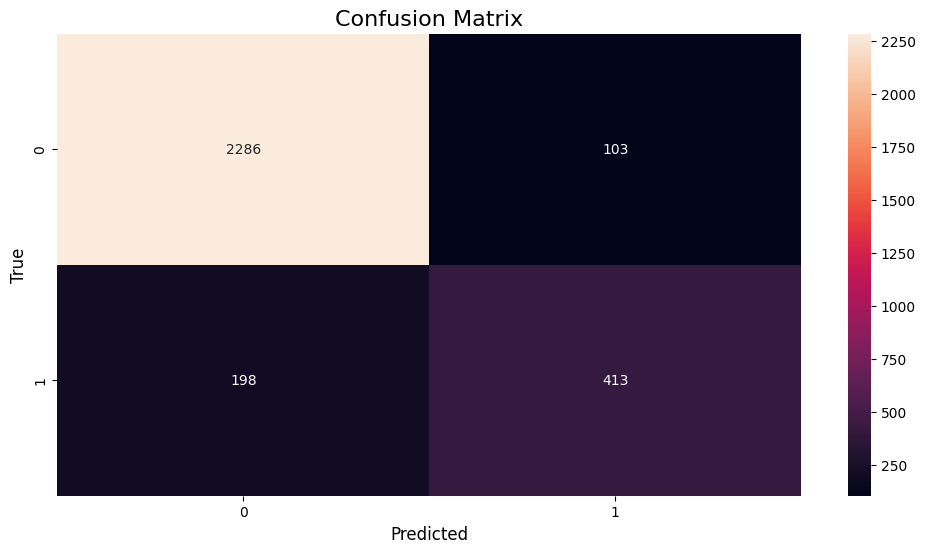

In [ ]:
# plot the confusion matrix

fig = plt.figure(figsize=(12, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix', fontsize=16, fontweight='medium')  # Enhance title
plt.xlabel('Predicted', fontsize=12)  # Enhance x-axis label
plt.ylabel('True', fontsize=12)  # Enhance y-axis label

plt.show()

In [ ]:
# Create a dictionaries of list of models to evaluate performance

models = {
    'LogisticRegression': (LogisticRegression(random_state=42), {'model__penalty': ['l1', 'l2'],'model__C': [0.001, 0.1, 1],'model__solver': ['liblinear', 'saga']}),
    'SVC': (SVC(random_state=42), {'model__C': [0.1, 1, 10],'model__kernel': ['linear','sigmoid'],'model__degree': [2,4], }),
    'DecisionTreeClassifier': (DecisionTreeClassifier(random_state=42), {'model__criterion': ['gini', 'entropy'],'model__max_depth': [None, 5, 10], 'model__splitter': ['best', 'random']}),
    'RandomForestClassifier': (RandomForestClassifier(random_state=42, class_weight='balanced'), {'model__n_estimators': [10, 100, 1000], 'model__max_depth': [None, 5, 10],'model__min_samples_split': [2, 5, 10]}), # Changed here to model__min_samples_split
    'KNeighborsClassifier': (KNeighborsClassifier(), {'model__n_neighbors': np.arange(3, 100, 2), 'model__weights': ['uniform', 'distance']}),
    'GaussianNB': (GaussianNB(), {'model__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}),
    'GradientBoostingClassifier': (GradientBoostingClassifier(random_state=42), {'model__loss': ['log_loss', 'exponential'], 'model__n_estimators': [10, 100, 1000],'model__learning_rate': [0.01, 0.1, 0.2],'model__max_depth': [3, 4, 5]}),
    'AdaBoostClassifier': (AdaBoostClassifier(random_state=42), {'model__n_estimators': [10, 100, 1000], 'model__learning_rate': [0.1, 0.01, 0.001],'model__algorithm': ['SAMME', 'SAMME.R']}),
    'LGBMClassifier': (LGBMClassifier(random_state=42), {'model__boosting_type': ['gbdt', 'dart', 'goss'],'model__learning_rate': [0.01, 0.1, 0.2],'model__n_estimators': [100, 200, 300],'model__max_depth': [-1, 5, 10],}),
    'CatBoostClassifier': (CatBoostClassifier(verbose=0, random_state=42), {'model__iterations': [100, 500, 1000], 'model__learning_rate': [0.01, 0.1, 1.0],'model__depth': [4, 6, 8],}),
    #'XGBClassifier': (XGBClassifier(random_state= 42,use_label_encoder=False, eval_metric='logloss'), {'max_depth': [3, 5, 7],'learning_rate': [0.1, 0.01, 0.001],'n_estimators': [100, 500, 1000],'gamma': [0, 0.1, 0.2],'subsample': [0.8, 0.9, 1.0]}),
}

results = []

# Train and predict each model with evaluation metrics
for name, (model, params) in models.items():
    # Create a pipeline with the model
    pipeline = Pipeline(steps=[('model', model)])

    # Create a grid search CV to tune the hyperparameters
    grid_search = GridSearchCV(pipeline, params, cv=5)

    # Fit the pipeline
    grid_search.fit(X_train, y_train)

    # Make predictions
    y_pred = grid_search.predict(X_test)

    # Calculate metrics
    Accuracy_Score = accuracy_score(y_test, y_pred)
    Precision_Score = precision_score(y_test, y_pred)
    Recall_Score= recall_score(y_test, y_pred)
    F1_Score = f1_score(y_test, y_pred)


    # print the performing metric
    print(name,'Accuracy score: ', accuracy_score(y_test, y_pred))
    print(name,'Precision score: ', precision_score(y_test, y_pred, average='micro'))
    print(name,'Recall score: ', recall_score(y_test, y_pred, average='micro'))
    print(name,'F1 score: ', f1_score(y_test, y_pred, average='micro'))
    print('\n')

    # Print the performing metrics
    #print(f"{name} - MSE: {mse}, R2: {r2}, MAE: {mae}")

    # Store results
    results.append({
        "Model": name,
        "Accuracy score": Accuracy_Score,  # Use the calculated Accuracy_Score
        "Precision score": Precision_Score,  # Use the calculated Precision_Score
        "Recall score": Recall_Score,  # Use the calculated Recall_Score
        "F1 score": F1_Score  # Use the calculated F1_Score
    })

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Select the best model based on the lowest MSE
best_model = results_df.loc[results_df['Accuracy score'].idxmax()]

print("\nBest Model:")
print(best_model)

LogisticRegression Accuracy score:  0.8693333333333333
LogisticRegression Precision score:  0.8693333333333333
LogisticRegression Recall score:  0.8693333333333333
LogisticRegression F1 score:  0.8693333333333333


SVC Accuracy score:  0.8693333333333333
SVC Precision score:  0.8693333333333333
SVC Recall score:  0.8693333333333333
SVC F1 score:  0.8693333333333333


DecisionTreeClassifier Accuracy score:  0.8853333333333333
DecisionTreeClassifier Precision score:  0.8853333333333333
DecisionTreeClassifier Recall score:  0.8853333333333333
DecisionTreeClassifier F1 score:  0.8853333333333333


RandomForestClassifier Accuracy score:  0.897
RandomForestClassifier Precision score:  0.897
RandomForestClassifier Recall score:  0.897
RandomForestClassifier F1 score:  0.897


KNeighborsClassifier Accuracy score:  0.866
KNeighborsClassifier Precision score:  0.866
KNeighborsClassifier Recall score:  0.866
KNeighborsClassifier F1 score:  0.866


GaussianNB Accuracy score:  0.8536666666666667
Ga

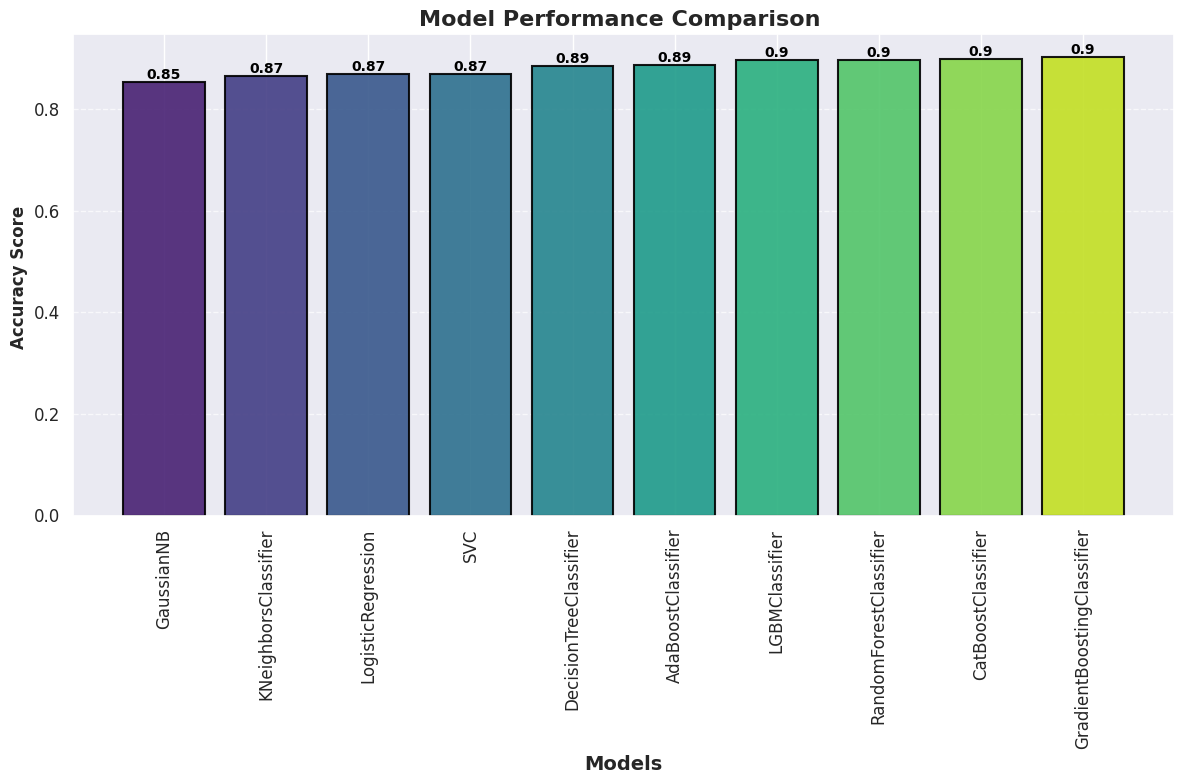

In [ ]:
# Sort the results DataFrame by MSE in ascending order
sorted_results_df = results_df.sort_values(by='Accuracy score')

# Set the aesthetics of the plot
sns.set(style="darkgrid", palette="pastel")

# Create a bar plot
plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_results_df['Model'], sorted_results_df['Accuracy score'], color=sns.color_palette("viridis", len(sorted_results_df)))

# Highlight the best model
best_model_index = sorted_results_df['Accuracy score'].idxmax()

# Adding labels and title with enhanced font styling
plt.xlabel('Models', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy Score ', fontsize=12, fontweight='bold')
plt.title('Model Performance Comparison ', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=12, fontweight='medium')
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a shadow effect to the bars
for bar in bars:
    bar.set_edgecolor('black')
    bar.set_linewidth(1.5)
    bar.set_alpha(0.9)  # Slight transparency for better visibility

# Add data labels on top of the bars with more styling
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2),
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Show the plot with a tight layout
plt.tight_layout()
plt.show()

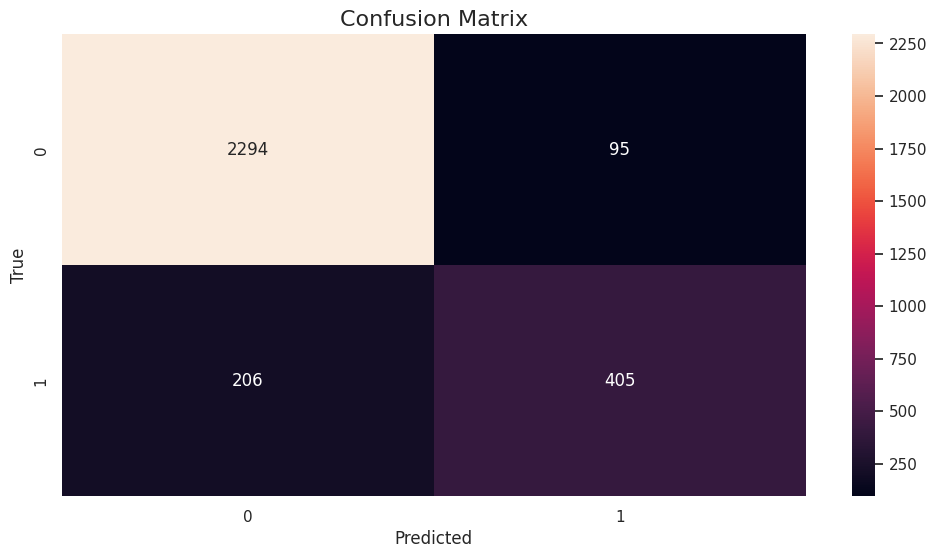

In [ ]:
# plot the confusion matrix

fig = plt.figure(figsize=(12, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix', fontsize=16, fontweight='medium')  # Enhance title
plt.xlabel('Predicted', fontsize=12)  # Enhance x-axis label
plt.ylabel('True', fontsize=12)  # Enhance y-axis label

plt.show()

In [ ]:
# create a submission file

# Ensure y_pred has the same length as df_sample
y_pred_full = model.predict(df_test) # Predict on the entire test data
y_pred_full = (y_pred_full > 0.5).astype(int)

df_sample['Exited'] = y_pred_full  # Assign the full predictions to the DataFrame
df_sample.to_csv('submission.csv', index=False)